In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# Taken from PyTorch's website --> used to unnormalize and show images | this step is not required
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def image_dims(image):
    image_height = image.size(2)
    image_width = image.size(3)

    print("Image height:", image_height)
    print("Image width:", image_width)

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5),)]) 

# Sets the mean and standard deviation for images (normalized) to 0.5 --> if using RGB images you need to provide 3 params for each

In [4]:
batch_size = 4

# Loading in data from PyTorch
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ("Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine")

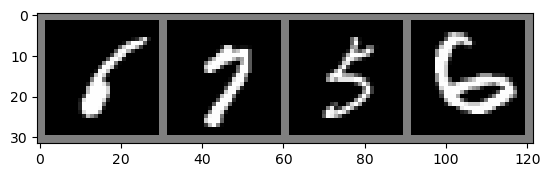

Six   Seven Five  Six  


In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
image_dims(images)

Image height: 28
Image width: 28


In [7]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 5, 4) # --> First param should be 1 for grayscale, 3 for RGB 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 16, 5) # --> must match output layers in first conv. layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 4 * 4, 120) # --> linear layers after convolutional layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [8]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
for epoch in range(2):  # Copied from PyTorch again --> check dimensions in the first linear layer

    train_loss = []

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            train_loss.append(running_loss / 2000) # --> add loss to a list to plot
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 0.434
[1,  4000] loss: 0.162
[1,  6000] loss: 0.114
[1,  8000] loss: 0.106
[1, 10000] loss: 0.093
[1, 12000] loss: 0.073
[1, 14000] loss: 0.083
[2,  2000] loss: 0.068
[2,  4000] loss: 0.071
[2,  6000] loss: 0.074
[2,  8000] loss: 0.069
[2, 10000] loss: 0.058
[2, 12000] loss: 0.062
[2, 14000] loss: 0.066
Finished Training


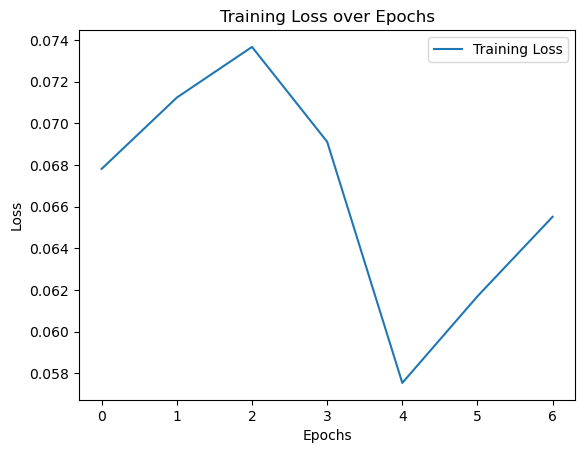

In [10]:
plt.plot(train_loss, label = "Training Loss") # --> matplotlib will automatically assume we are plotting the loop
plt.xlabel("Epochs") 
plt.ylabel("Loss") # --> loss is "response" to each epoch
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

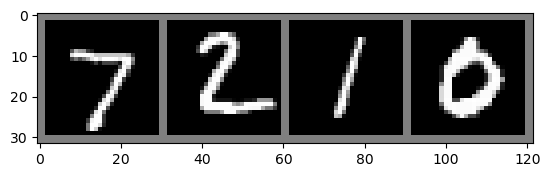

Actual:  Seven Two   One   Zero 


In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('Actual: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [12]:
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Seven Two   One   Zero 


In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %
